In [2]:
import numpy as np
np.random.seed(0) 

print("Exercise PML 2023!")
# A) Create dataset by sampling 20 points and labels
X = np.random.normal(0, 1, (20, 2))
theta = np.array([-1, 1])
# Get x^T * theta
x_theta = X @ theta

y = np.random.normal(x_theta, 0.001)

# B) Compute mean and variance of posterior
f = x_theta
mu = np.zeros(2)
var = np.eye(2)

var_post = np.linalg.inv(var + X.T @ X)
mu_post = var_post @ X.T @ y
# C) Compute posterior predictive
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
grid = np.array(np.meshgrid(x1, x2)).T.reshape(-1, 2)

sigma_noise = 0.1
mu_predictive = grid @ mu_post 
predictive_variances = np.array([
    x.T @ var_post @ x + sigma_noise**2 for x in grid
])

# D) Input points from MVN
cov_X = np.array([[0.1, 0], [0, 1]])

print(f"Posterior Mean: {mu_post} \nPosterior Variance: {var_post}")

Exercise PML 2023!
Posterior Mean: [-0.96564027  0.95159354] 
Posterior Variance: [[ 0.03340412 -0.00118734]
 [-0.00118734  0.04708709]]


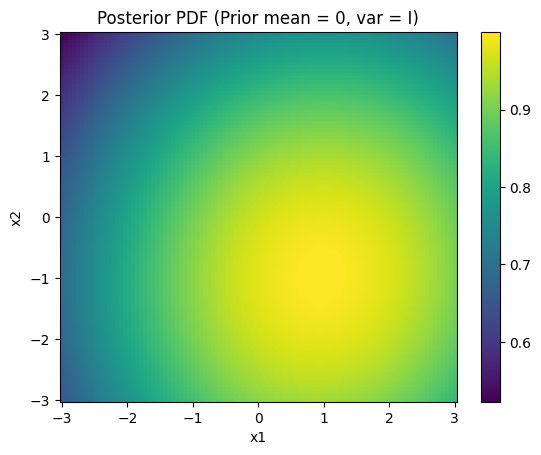

In [3]:
# Plot the PDF in the range θ∈[−3,3]^2

import matplotlib.pyplot as plt

PDF = np.array([np.exp(-0.5 * (x - mu_post).T @ var_post @ (x - mu_post)) for x in grid])
PDF = PDF.reshape(100, 100)

plt.figure()
plt.pcolormesh(x1, x2, PDF)
plt.colorbar()
plt.title("Posterior PDF (Prior mean = 0, var = I)")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

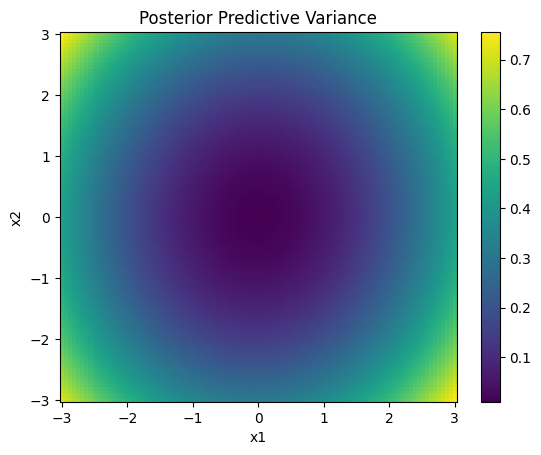

In [4]:
# Plot the posterior predictive its variance for inputs in the range 

predictive_variances = predictive_variances.reshape(100, 100)

plt.figure()
plt.pcolormesh(x1, x2, predictive_variances, shading='auto')
plt.colorbar()
plt.title("Posterior Predictive Variance")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()




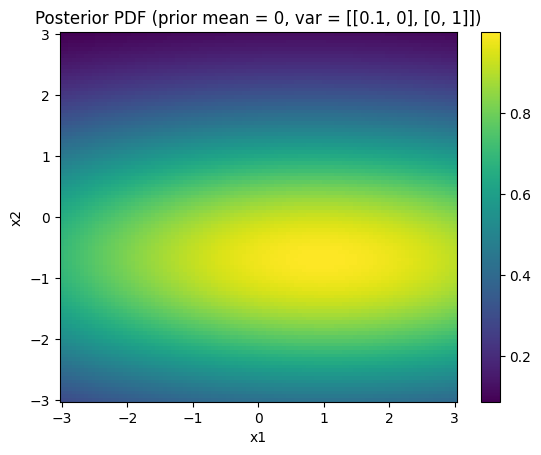

In [11]:
# D) Input points from MVN
cov_X = np.array([[0.1, 0], [0, 1]])

X = np.random.multivariate_normal(mean=np.zeros(2), cov=cov_X, size=20)
theta = np.array([-1, 1])
# Get x^T * theta
x_theta = X @ theta

y = np.random.normal(x_theta, 0.01)

# B) Compute mean and variance of posterior
f = x_theta
mu = np.zeros(2)
var = np.eye(2)

var_post = np.linalg.inv(var + X.T @ X)
mu_post = var_post @ X.T @ y
# C) Compute posterior predictive
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
grid = np.array(np.meshgrid(x1, x2)).T.reshape(-1, 2)

sigma_noise = 0.1
mu_predictive = grid @ mu_post 
predictive_variances = np.array([
    x.T @ var_post @ x + sigma_noise**2 for x in grid
])

PDF = np.array([np.exp(-0.5 * (x - mu_post).T @ var_post @ (x - mu_post)) for x in grid])
PDF = PDF.reshape(100, 100)

plt.figure()
plt.pcolormesh(x1, x2, PDF)
plt.colorbar()
plt.title("Posterior PDF (prior mean = 0, var = [[0.1, 0], [0, 1]])")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()


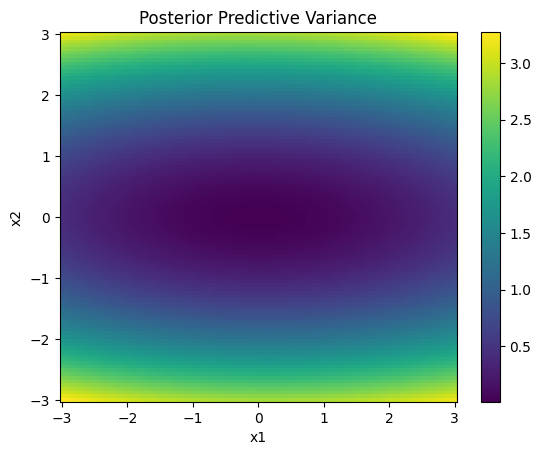

In [12]:
predictive_variances = predictive_variances.reshape(100, 100)

plt.figure()
plt.pcolormesh(x1, x2, predictive_variances, shading='auto')
plt.colorbar()
plt.title("Posterior Predictive Variance")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
